In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import os



Number of images in lionel_messi folder: 31
Number of images in virat_kohli folder: 36
Number of images in serena_williams folder: 26
Number of images in maria_sharapova folder: 29
Number of images in roger_federer folder: 25


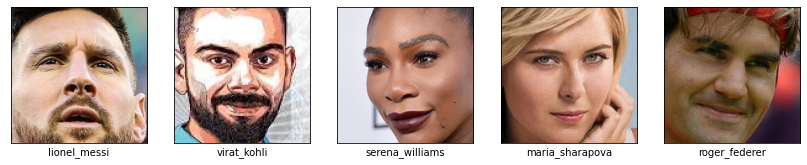

In [8]:
from tensorflow.keras.utils import load_img

train_dir = '/home/sahil/Facial-Recognition/Train'
validation_dir = '/home/sahil/Facial-Recognition/Validation'

plt.figure(figsize = (20,5))
x = 1

#iterating over every expressin
for expressions in os.listdir(train_dir):
  expression = os.path.join(train_dir, expressions)
  expression_dir = os.listdir(expression)
  print(f"Number of images in {expressions} folder: {len(expression_dir)}")

  ax = plt.subplot(1,7,x)
  plt.imshow(load_img(f"{os.path.join(expression, np.random.choice(expression_dir))}"))
  x+=1
  plt.xlabel(expressions) # writing label for each expression

  #turning x ans y tick marks off
  ax.set_xticks([])
  ax.set_yticks([])

plt.subplots_adjust(hspace = 0.3)

plt.show()


In [9]:
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [10]:


train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 147 images belonging to 5 classes.
Found 21 images belonging to 5 classes.


In [11]:
# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/home/sahil/.local/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,574,853 (13.64 MB)

 Trainable params: 1,316,869 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
]


history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)


Epoch 1/20


/home/sahil/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 858ms/step - accuracy: 0.1942 - loss: 2.1990 - val_accuracy: 0.4762 - val_loss: 1.3572
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.5326 - loss: 1.3280 - val_accuracy: 0.9524 - val_loss: 0.4628
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.6588 - loss: 0.8451 - val_accuracy: 0.7619 - val_loss: 0.7029
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.8075 - loss: 0.4876 - val_accuracy: 0.8095 - val_loss: 0.6576
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 726ms/step - accuracy: 0.7911 - loss: 0.7386 - val_accuracy: 0.9048 - val_loss: 0.4042
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 656ms/step - accuracy: 0.9217 - loss: 0.2946 - val_accuracy: 0.8095 - val_loss: 0.4179
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 985ms/step - accuracy: 0.8716 - loss: 0.2978 - val_accuracy: 0.9048 - val_loss: 0.3128
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.9247 - loss: 0.2263 - val_accuracy: 0.9048 - val_loss: 0.3519
Epo

In [17]:

# Define class names

class_names = dict((v, k) for k, v in validation_generator.class_indices.items())
print(class_names) 

{0: 'lionel_messi', 1: 'maria_sharapova', 2: 'roger_federer', 3: 'serena_williams', 4: 'virat_kohli'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step


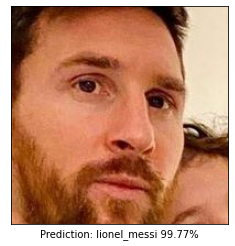

True label: lionel_messi, Predicted label: lionel_messi, Confidence: 99.77%, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


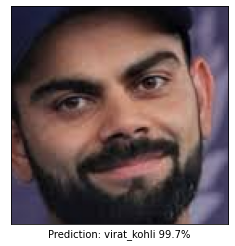

True label: virat_kohli, Predicted label: virat_kohli, Confidence: 99.7%, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


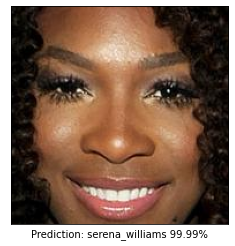

True label: serena_williams, Predicted label: serena_williams, Confidence: 99.99%, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


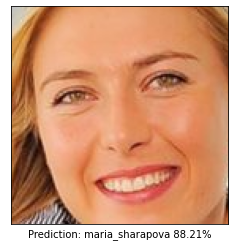

True label: maria_sharapova, Predicted label: maria_sharapova, Confidence: 88.21%, Correct: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


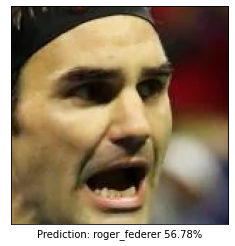

True label: roger_federer, Predicted label: roger_federer, Confidence: 56.78%, Correct: True


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array


def predict_image(file_path, true_label):
    img = load_img(file_path)
    plt.imshow(img)
    img = load_img(file_path, target_size=(224, 224))

    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    prediction = class_names[np.argmax(classes)]
    confidence = round(np.max(classes) * 100, 2)

    plt.xlabel(f"Prediction: {prediction} {confidence}%")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    correct = prediction == true_label
    print(f"True label: {true_label}, Predicted label: {prediction}, Confidence: {confidence}%, Correct: {correct}")

# List all subdirectories in the validation directory
subdirs = [d for d in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, d))]

# Process one image from each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(validation_dir, subdir)
    image_files = [os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))]
    
    if image_files:
        first_image = image_files[0]
        true_label = subdir  # Assuming the folder name is the true label
        predict_image(first_image, true_label)

In [23]:

loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy*100:.2f}%')

# Save the model
model.save('face_recognition_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9048 - loss: 0.2952
Validation accuracy: 90.48%
